# Data Project 3 - Election Analysis

This project will look at two datasets related to the 2012 election. The first dataset is the results from poll data and the second contains information about the donations given to each candidate.

    For the first data set, the following questions will be explored:

1) Who was being polled and what was their party affiliation?

2) Did the poll results favor Romney or Obama?

3) How do undecided voters effect the poll?

4) Can we account for the undecided voters?

5) How did voter sentiment change over time?

6) Can we see an effect in the polls from the debates?


    For the second:

1) How much was donated and what was the average donation?

2) How did the donations differ between candidates?

3) How did the donations differ between Democrats and Republicans?

4) What were the demographics of the donors?

5) Is there a pattern to donation amounts?

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from __future__ import division

In [2]:
# Use to grab data from the web (HTTP capabilities)
import requests

# For timestamps
from datetime import datetime

# StringIO will allow us to convert text files into .csv files so
# they can be used in a Dataframe through the .read() method.

from io import StringIO

I was unable to retrieve the poll data from the website posted in instructor's version of this data project. 

I was able to use the original csv file to retrieve the polling data.

In [3]:
# This is the url link for the poll data in csv form
url2 = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use requests to get the information in text form
source2 = requests.get(url2).text

# Use StringIO to avoid an IO error with pandas
poll_data2 = StringIO(source2) 

In [4]:
poll_df2 = pd.read_csv(poll_data2)

In [5]:
poll_df2

,"<?xml version=""1.0"" encoding=""iso-8859-1""?>"
0,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T..."
1,"""http://www.w3.org/TR/xhtml1/DTD/xhtm..."
2,"<html xmlns=""http://www.w3.org/1999/xhtml"" xml..."
3,\t<head>
4,\t\t<title>403 - Forbidden</title>
5,\t</head>
6,\t<body>
7,\t\t<h1>403 - Forbidden</h1>
8,\t</body>
9,</html>


Best way to retrieve the polling data:

In [6]:
poll_df = pd.read_csv("2012-general-election-romney-vs-obama.csv")

In [7]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [8]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


Now it's time to start finding some answers to the questions psoed:

# Who was being pulled and what was their party affiliation?

Time to create some bar plots that distinguishes voting groups

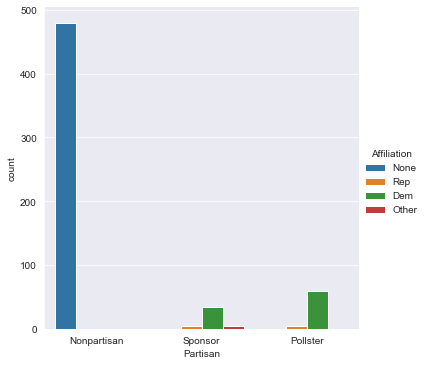

In [9]:
sns.catplot(x='Partisan',data=poll_df,hue='Affiliation',kind='count')

I wonder if the non-partisan polls decided not to ask for party affiliation, explaining why all the people polled from those polls had no politcal affiliation.

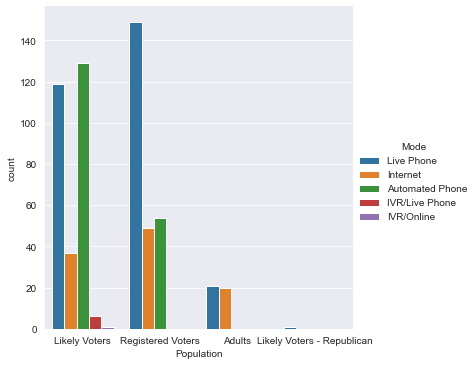

In [10]:
sns.catplot(x='Population',data=poll_df,kind='count',hue='Mode')

Most of the likely voters or registered voters were contacted through a live or automated phone calls. Adults that weren't affiliated/likely voters seemed to only be contacted by live phone or via the internet, no IVR or automated phone calls.

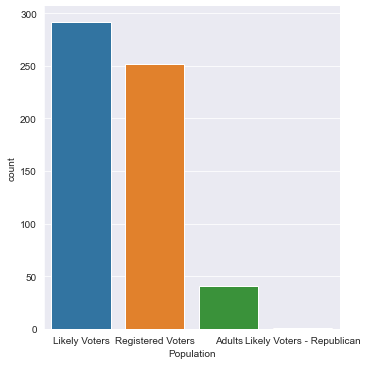

In [11]:
sns.catplot(x='Population',data=poll_df,kind='count')

In [12]:
poll_df['Population'].value_counts()

Likely Voters                 292
Registered Voters             252
Adults                         41
Likely Voters - Republican      1
Name: Population, dtype: int64

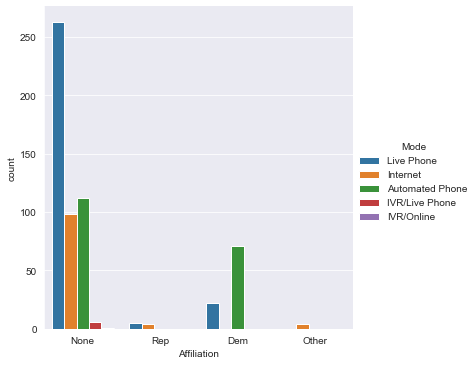

In [13]:
sns.catplot(x='Affiliation',data=poll_df,kind='count',hue='Mode')

Automated calls were only conducted on Democratic voters or non-affiliated/randomly selected voters. Democratic voters weren't polled at all via the internet or IVR.

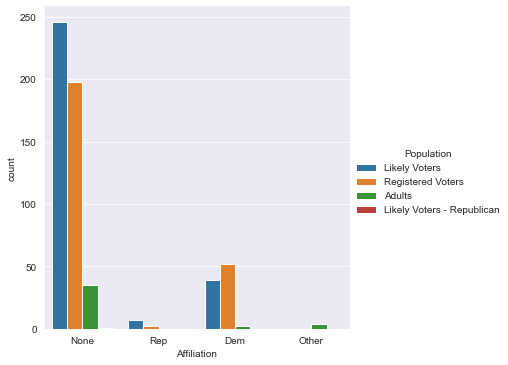

In [14]:
sns.catplot(x='Affiliation',data=poll_df,kind='count',hue='Population')

I'm curious as to why they didn't label the 'Adult' category as undecided voters.

A significant amount of likely and registered voters amongst the non-affiliated category, suggesting those polls randomly selected people to poll without asking for their party affiliation.

There is clearly more polls being done for people affiliated with the Democratic Party.

## Do the poll results favor Romney or Obama?

Here we can just take the mean and standard deviation for both of these categories and create a concatenated DataFrame containing this information.

In [15]:
avg = DataFrame(poll_df.mean())

In [16]:
avg

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [17]:
avg.drop(['Number of Observations','Other',
         'Question Text','Question Iteration'],axis=0,inplace=True)

In [18]:
avg.rename(mapper={0:'Average pct. of voters'},axis=1)

,Average pct. of voters
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [19]:
std = DataFrame(poll_df.std())

In [20]:
std.drop(['Number of Observations','Other',
         'Question Text','Question Iteration'],axis=0,inplace=True)

In [21]:
std.rename(mapper={0:'Standard Deviation of Pct. Voters'},axis=1)

,Standard Deviation of Pct. Voters
Obama,2.422058
Romney,2.906180
Undecided,3.701754


<AxesSubplot:>

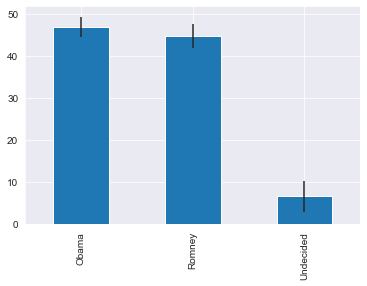

In [22]:
avg.plot(yerr=std,kind='bar',legend=False)

Obama was slightly ahead in the polls, but the standard deviation between him and Romney suggestes it was close enough to have gone either way. Their is also a significant amount of deviation in the undecided voters (unsurprisingly).

## How do the undecided voters effect the polls?

In [23]:
poll_avg = pd.concat([avg,std],axis=1)

In [24]:
poll_avg.columns = ['Average','STD']

In [25]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


<AxesSubplot:xlabel='End Date'>

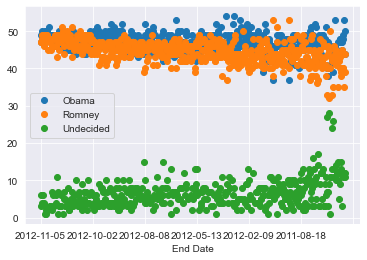

In [26]:
poll_df.plot(x='End Date', y=['Obama','Romney','Undecided'],linestyle ='',marker='o')

As you go from right to left, you get closer and closer to the election date. If you look at the undecided voters, their numbers decrease as you get closer to the election, while the gap between Obama and Romney has narrowed.

In [27]:
# Let's see what the percent difference is between the two candidates:
# A positive difference means Obama is winning, while a negative difference
# means Romney is winning.

poll_df['Difference'] = (poll_df.Obama-poll_df.Romney)/100

In [28]:
poll_df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,PPP (D),2009-07-15,2009-07-16,2010-11-08T11:02:37Z,577.0,Registered Voters,Automated Phone,49.0,40.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1,0.09
582,PPP (D),2009-06-12,2009-06-16,2010-11-08T10:58:00Z,638.0,Registered Voters,Automated Phone,48.0,40.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1,0.08
583,PPP (D),2009-05-14,2009-05-18,2010-11-08T10:49:08Z,1000.0,Registered Voters,Automated Phone,53.0,35.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1,0.18
584,PPP (D),2009-04-17,2009-04-19,2010-11-08T10:45:18Z,686.0,Registered Voters,Automated Phone,50.0,39.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1,0.11


Assuming these undecided voters votes will be split evenly, let's see what this does to the election results:

# How did voter sentiment change over time?

Now, we'll take a look at grouping the dataframe by date, taking the mean of of the voter percent for each day, and graphing that information.

In [29]:
# The as_index=False arguments keeps the ordering of the index values
# after sorting them by the start date.
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

In [30]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


<AxesSubplot:xlabel='Start Date'>

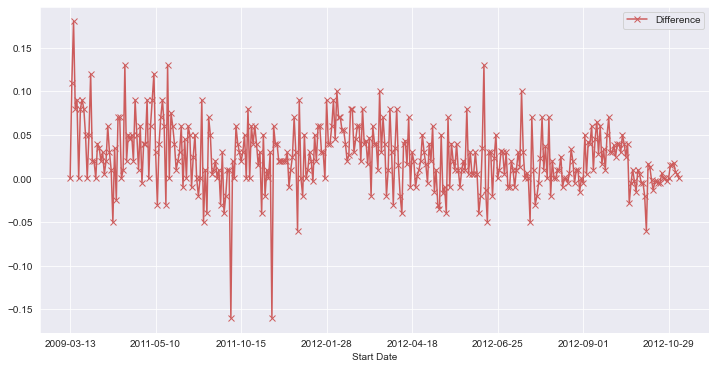

In [31]:
# Plot the difference over time
poll_df.plot(x='Start Date',y='Difference',figsize=(12,6),marker='x',color='indianred')

Obama was winning considerably early on, but then Romney started to gain some traction. There are two dates where Romney was considerably the favorite, either indicating some major sway in voter sentiment (Obama was president during this time) or there were a significant number of polls taken on those dates that asked a portion of voters who were heavily in favor of Romney. 

The weekly address around this time specifies a proposition for the Jobs Act, which could have had a negative reponse from conservatives and independent voters.

Interestingly enough, it doesn't appear that independent voters were being tracked for this election cycle.

In [32]:
# Let's see what window of index values had these two outliers:
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2011-10':
        xlimit.append(row_in)
        row_in+=1
    else:
        row_in+=1
        
print(min(xlimit))
print(max(xlimit))

92
105


So it appears these two points where Romney is winning heavily in the polls are between index values 325 and 352.

In [33]:
poll_df[92:106]

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
92,2011-10-01,715.0,44.0,43.0,7.0,NaN,NaN,1,0.01
93,2011-10-03,1581.0,41.0,40.0,9.0,11.0,NaN,1,0.01
94,2011-10-05,602.0,37.0,53.0,10.0,NaN,NaN,1,-0.16
95,2011-10-06,1000.0,46.0,44.0,5.0,5.0,NaN,1,0.02
96,2011-10-07,700.0,45.0,45.0,10.0,NaN,NaN,1,0.00
97,2011-10-08,715.0,47.0,41.0,7.0,NaN,NaN,1,0.06
98,2011-10-09,919.5,48.0,44.0,5.0,3.0,NaN,1,0.04
99,2011-10-13,1000.0,48.0,45.0,2.0,5.0,NaN,1,0.03
100,2011-10-15,1000.0,45.0,43.0,5.5,NaN,NaN,1,0.02
101,2011-10-22,715.0,45.0,42.0,6.0,NaN,NaN,1,0.03


The strong disapproval of Obama appears to have occurred on October 5th, 2011 and sometime after October, 2011.

## Can we see an effect in the polls after the debate?

In [34]:
# Let's see what the difference in voter approval looked like a month before the election

row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in+=1
    else:
        row_in+=1
        
print(min(xlimit))
print(max(xlimit))

325
352


In [35]:
poll_df[325:353]

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
325,2012-10-01,1746.000000,48.500000,46.000000,3.000000,NaN,NaN,1,0.025000
326,2012-10-02,590.000000,49.000000,45.000000,6.000000,NaN,NaN,1,0.040000
327,2012-10-04,1061.500000,45.833333,48.666667,6.000000,NaN,NaN,1,-0.028333
328,2012-10-05,1000.000000,46.000000,46.500000,7.000000,1.000000,NaN,1,-0.005000
329,2012-10-06,895.000000,46.500000,45.500000,4.500000,3.000000,NaN,1,0.010000
330,2012-10-07,1197.333333,47.000000,47.333333,4.666667,1.500000,NaN,1,-0.003333
331,2012-10-08,2030.000000,46.500000,48.000000,5.000000,2.000000,NaN,1,-0.015000
332,2012-10-10,1118.000000,48.000000,47.000000,3.500000,2.000000,NaN,1,0.010000
333,2012-10-11,1335.250000,47.000000,46.500000,5.666667,1.666667,NaN,1,0.005000
334,2012-10-12,1231.500000,46.500000,47.000000,6.500000,NaN,NaN,1,-0.005000


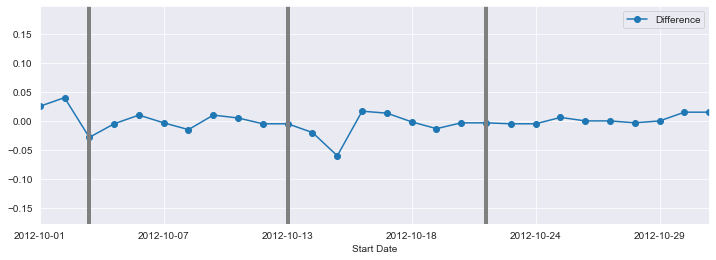

In [36]:
# Plot the same graph before, but include the xlim argument,
# specifying the index values for the desired window in time.

poll_df.plot(x='Start Date', y='Difference', figsize=(12,4),
             linestyle='-', marker='o', xlim=(325,352))

#Plot vertical bars at specific dates:

#Oct 4rd:
plt.axvline(x=325+2,linewidth=4,color='grey')

#Oct 11th:
plt.axvline(x=325+10,linewidth=4,color='grey')

#Oct 22th:
plt.axvline(x=343, linewidth=4,color='grey')

These vertical lines indicate the debate dates. It seem like above gained a few percent points after the 1st debate, while losing .05 percentage points right after the 2nd debate, later regaining those points soon after, and the race was even after the 3rd debate.

# Donor Data Analysis

As a reminder, here are the questions that should be answered:

1) How much was donated and what was the average donation?

2) How did the donations differ between candidates?

3) How did the donations differ between Democrats and Republicans?

4) What were the demographics of the donors?

5) Is there a pattern to donation amounts?

In [37]:
# Import donor .csv file into a dataframe
donor_df= pd.read_csv("Election_Donor_Data.csv",low_memory=False)
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


The low_memory=False is applied as without it, a warning saying column 6 (contbr_zip) has mixed objects types. The other solution for this is to specify the dtype when importing the file.

In [38]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

## How much was donated and what is the average donation amount?

In [39]:
donor_df['contb_receipt_amt'].value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [40]:
donor_df['contb_receipt_amt'].sum()

298751395.14000005

The total amount of donations was roughly 299 million dollars.

In [41]:
don_avg = donor_df['contb_receipt_amt'].mean()

In [42]:
don_avg

298.2351500951093

The average donor donated 298 dollars.

In [43]:
don_std = donor_df['contb_receipt_amt'].std()
don_std

3749.666723269043

In [44]:
print('The average donation was $%.2f and the std was $%.2f.' %(don_avg, don_std))

The average donation was $298.24 and the std was $3749.67.


That standard deviation is massive. Let's look at some of the top donors.

In [45]:
top_donor = donor_df['contb_receipt_amt'].copy()

In [46]:
len(top_donor)

1001731

In [47]:
top_donor.nsmallest(len(top_donor))

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [48]:
top_donor.nlargest(len(top_donor))

325136    2014490.51
326651    1944042.43
344539    1679114.65
344419    1511192.17
319478     526246.17
             ...    
250737      -5455.00
398429      -5500.00
101356      -7500.00
226986     -25800.00
114604     -30800.00
Name: contb_receipt_amt, Length: 1001731, dtype: float64

The .nsmallest() function provides a sorted series of values from smallest to largest, where .nlargest() does the opposite. As you can see, there are negative numbers in the dataset that correspond to refunded donations. Let's get rid of those values and then see what the average and std are.

In [49]:
for x in range(0,len(donor_df['contb_receipt_amt'])):
    if donor_df['contb_receipt_amt'][x] <= 0:
        donor_df['contb_receipt_amt'].loc[x] = 0
    else:
        pass

C:\Users\dfbod\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [50]:
donor_df.nsmallest(len(top_donor),columns=['contb_receipt_amt']).head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
472062,C00431445,P80003338,"Obama, Barack","RUPPERT, GARY",CONCORD,NH,033016906,NaN,NaN,0.0,08-NOV-11,Refund,NaN,NaN,SB28A,772372
687167,C00431445,P80003338,"Obama, Barack","KASSOVER, PHILLIPPA",LAKE FOREST PARK,WA,981554354,NaN,NaN,0.0,19-SEP-11,Refund,NaN,NaN,SB28A,756218
687166,C00431445,P80003338,"Obama, Barack","BOGGESS, PAULA N",SEATTLE,WA,981262765,NaN,NaN,0.0,11-JUL-11,Refund,NaN,NaN,SB28A,756218
687162,C00431445,P80003338,"Obama, Barack","EASTER, ROBERT BRUCE BRUCE JR",SEATTLE,WA,981446146,NaN,NaN,0.0,27-JUN-11,Refund,NaN,NaN,SB28A,756214
687161,C00431445,P80003338,"Obama, Barack","DEAR, JOSEPH",OLYMPIA,WA,985012853,NaN,NaN,0.0,27-JUN-11,Refund,NaN,NaN,SB28A,756214


In [51]:
top_donor = donor_df['contb_receipt_amt'].copy()

In [52]:
adj_don_avg = donor_df['contb_receipt_amt'].mean()
adj_don_std = donor_df['contb_receipt_amt'].std()

print('The adjusted average donation is $%.2f and the std is $%.2f.' %(adj_don_avg, adj_don_std))

The adjusted average donation is $309.00 and the std is $3745.29.


In [53]:
top_donor = top_donor[top_donor>0]

Let's make a histogram with the new receipt totals to see what the most common donations are:

(array([2.13595e+05, 2.01774e+05, 3.10100e+04, 1.84933e+05, 1.45430e+04,
        1.76250e+04, 2.79600e+03, 3.06430e+04, 1.79760e+04, 9.22450e+04,
        1.29100e+03, 1.19560e+04, 8.15000e+02, 1.53600e+03, 1.85300e+03,
        3.29300e+03, 2.65000e+02, 5.66000e+02, 2.28000e+02, 5.81800e+04,
        4.45000e+02, 3.40000e+02, 8.50000e+01, 8.07000e+02, 1.25000e+02,
        1.11000e+02, 6.30000e+01, 3.43000e+02, 4.80000e+01, 1.09900e+03,
        4.20000e+01, 3.09000e+02, 3.70000e+01, 7.70000e+01, 3.60000e+01,
        2.15000e+02, 2.90000e+01, 6.10000e+01, 4.50000e+01, 3.66590e+04,
        1.10000e+02, 6.90000e+01, 1.30000e+01, 1.08000e+02, 4.50000e+01,
        4.50000e+01, 1.80000e+01, 2.15000e+02, 2.70000e+01, 9.00000e+00,
        1.31000e+03, 2.00000e+01, 8.10000e+01, 7.00000e+00, 2.40000e+01,
        2.60000e+01, 9.50000e+01, 1.60000e+01, 4.50000e+01, 3.30000e+01,
        3.71800e+03, 1.00000e+01, 1.40000e+01, 1.40000e+01, 4.30000e+01,
        8.00000e+00, 2.40000e+01, 6.00000e+00, 5.00

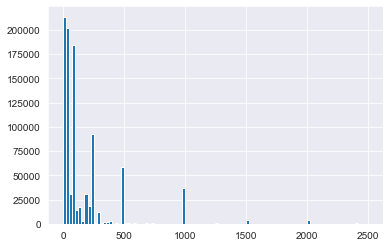

In [54]:
com_don = top_donor[top_donor<2500]
plt.hist(x=com_don,bins=100)

Now let's separate donations by party and by candidates:

## How did the donations differ by candidates?

In [55]:
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In order to distinguish each candidates' party affiliation, it would be best to map this affiliation into a 'Party Affiliation' column. The easiest would be to do it through mapping a dictionary to the newly constructed column, as every instance where their name appears registers the desired translation. You could also groupby cand_nm, count the number of times each name appears with value_counts, and then create an array implementing the appropriate party affiliations (more computationally/time intensive). You can also do a for loop, but it is also much slower computationally.

Always remember, you can always speed things up with a hash map.

In [56]:
# Dictionary of party affiliations:
party_map = {'Bachmann, Michelle':'Republican',
             'Cain, Herman':'Republican',
            'Romney, Mitt':'Republican', 
             'Obama, Barack':'Democrat',
            "Roemer, Charles E. 'Buddy III'":'Republican',
            'Pawlenty, Timothy':'Republican',
             'Johnson, Gary Earl':'Republican',
            'Paul, Ron':'Republican',
             'Santorum, Rick':'Republican',
            'Gingrich, Newt':'Republican',
             'McCotter, Thaddeus G':'Republican',
            'Huntsman, Jon':'Republican',
             'Perry, Rick':'Republican'}

# Use map to configure the new 'Party Affiliation' column:

donor_df['Party Affiliation']= donor_df.cand_nm.map(party_map)

In [57]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party Affiliation
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [58]:
donor_df = donor_df[donor_df['contb_receipt_amt']>0]

Zeroed refunds

In [59]:
cand_counts = donor_df.groupby('cand_nm')['contb_receipt_amt'].count()
cand_counts

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

Now let's look at the dollar amounts for each candidate:

In [60]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

For more of a legible notation:

In [61]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i=0

for don in cand_amount:
    print('The candidate %s raised $%.0f from donations.' %(cand_amount.index[i],don))
    print('\n')
    i+=1

The candidate Bachmann, Michelle raised $2711439 from donations.


The candidate Cain, Herman raised $7101082 from donations.


The candidate Gingrich, Newt raised $12832770 from donations.


The candidate Huntsman, Jon raised $3330373 from donations.


The candidate Johnson, Gary Earl raised $566962 from donations.


The candidate McCotter, Thaddeus G raised $39030 from donations.


The candidate Obama, Barack raised $135877427 from donations.


The candidate Paul, Ron raised $21009620 from donations.


The candidate Pawlenty, Timothy raised $6004819 from donations.


The candidate Perry, Rick raised $20305754 from donations.


The candidate Roemer, Charles E. 'Buddy' III raised $373010 from donations.


The candidate Romney, Mitt raised $88335908 from donations.


The candidate Santorum, Rick raised $11043159 from donations.




Now we create a barplot of these values:

<AxesSubplot:xlabel='cand_nm'>

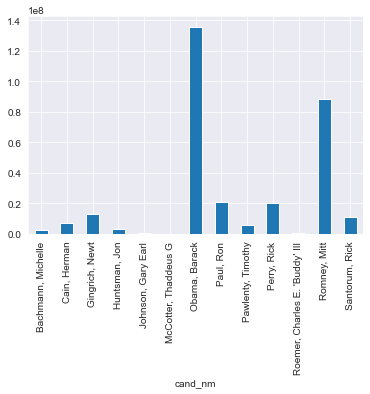

In [62]:
cand_amount.plot(kind='bar')

Let's do the same thing but for party affiliation.

## How did the donations differ by party affiliation?

In [63]:
party_amt = donor_df.groupby('Party Affiliation')['contb_receipt_amt'].sum()
party_amt

Party Affiliation
Democrat      1.358774e+08
Republican    1.732809e+08
Name: contb_receipt_amt, dtype: float64

<AxesSubplot:xlabel='Party Affiliation'>

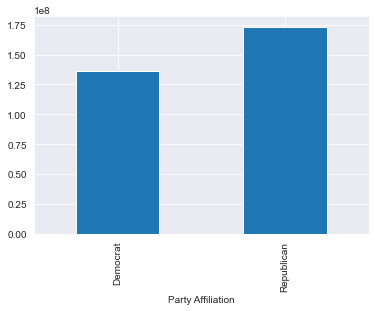

In [64]:
party_amt.plot(kind='bar')

This result makes sense, as it was an entire party of candidates vs. one candidate representing their entire party in a re-election cycle.

## What were the demographics of the donors?

In [65]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                    index = 'contbr_occupation',
                                    columns = 'Party Affiliation',
                                    aggfunc = 'sum')

In [66]:
occupation_df

Party Affiliation,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


Since there are so many occupational types, we'll have to limit the donor amount to look at to be above a threshold value (i.e. 1,000,000 dollars). I'll look at 500,000 dollars or more.

In [67]:
occupation_df = occupation_df[occupation_df.sum(1)>500000]

In [68]:
occupation_df.shape

(57, 2)

<AxesSubplot:ylabel='contbr_occupation'>

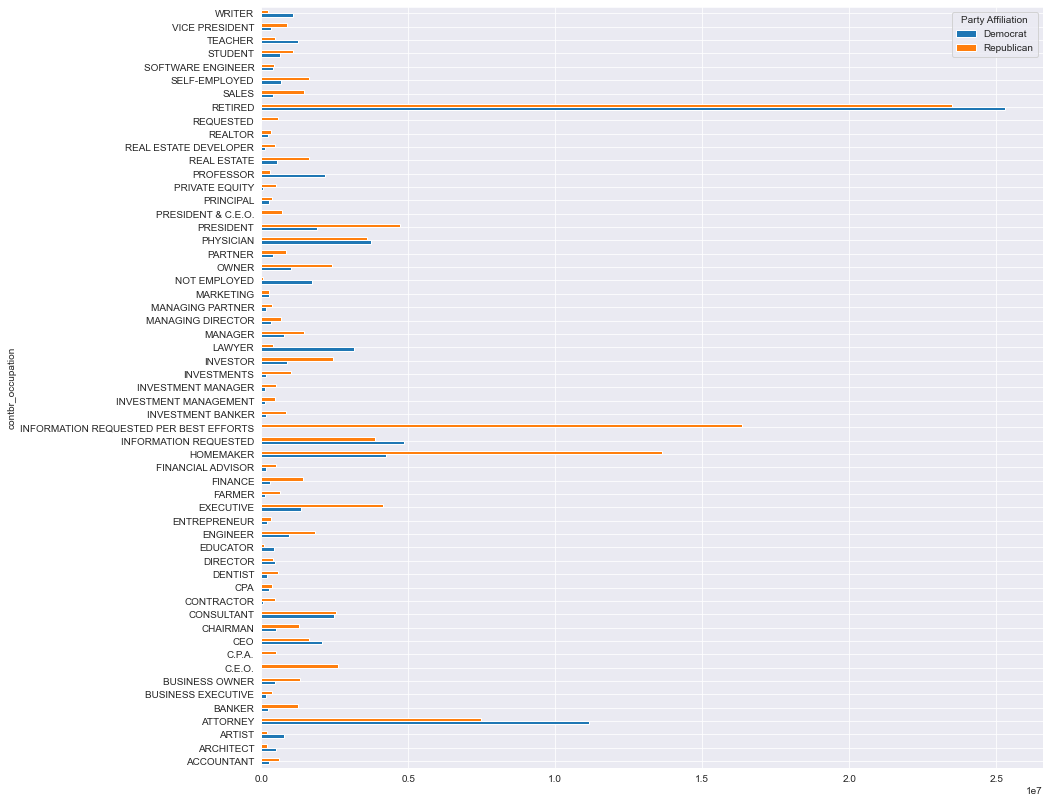

In [69]:
occupation_df.plot(kind='barh',figsize = (14,14))

There's a lot to take away from this bar plot. We can see a considerable amount of donations come from people who are retired. Professions that donate more favorably to Democrats are writers, teachers, professors, lawyers, unemployed persons, attorneys, artists, and architects. 

Professions that donate more favorably for Republicans are VPs, self-employed, Presidents/CEOs, Real Estate, Private Equity, careers related to investment, homemakers (people who work from home), executives, engineers, farmers, dentists, bankers and business owners. 

There are two categories that are also solely related to donations given to Republicans where information about those individuals was asked for but no response was given. These make up the second-largest category of all Republican donations behind donations from retired individuals.

Let's drop those anonymous columns and see how the barplot looks with those removed. Let's also combine the CEO and C.E.O. categories.

In [70]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

C:\Users\dfbod\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [71]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

C:\Users\dfbod\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-71-f92dec35705e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']


In [72]:
occupation_df.drop('C.E.O.',inplace=True)

<AxesSubplot:ylabel='contbr_occupation'>

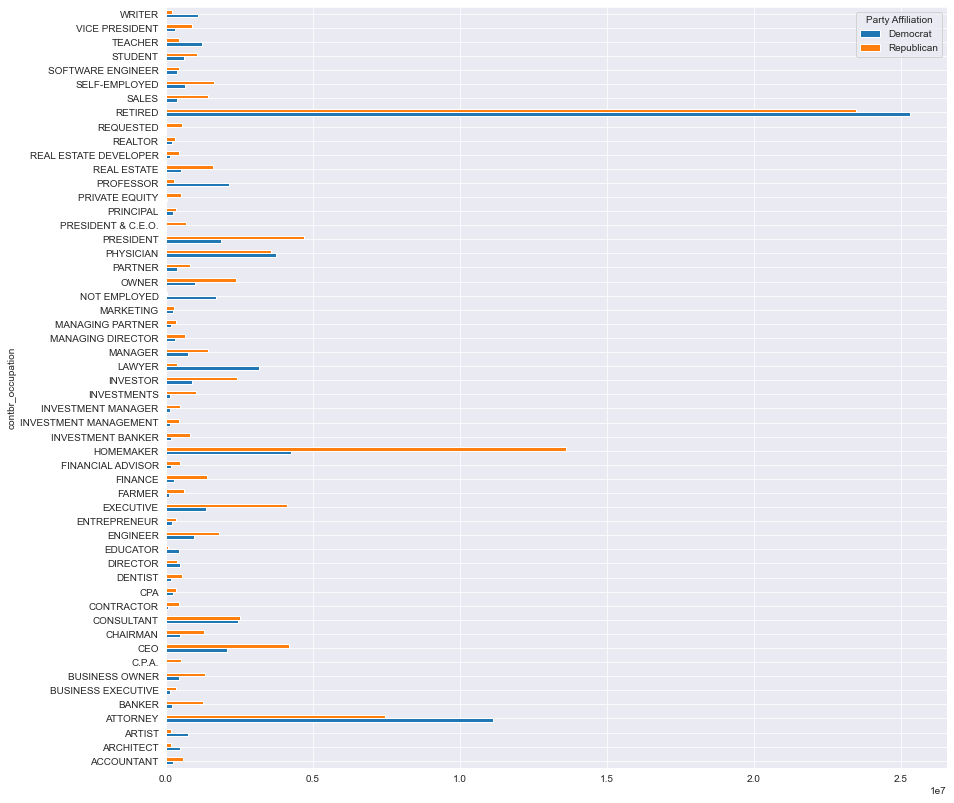

In [73]:
occupation_df.plot(kind='barh',figsize = (14,14))

Now we can see CEOs made more donations to Republicans than Democrats in this election cycle.